# Ex 4.9 Intro to Visulization with Python Part 1 (Tasks 1-8)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\jecka\2023-09-11 Achievement 4 Python'

In [ ]:
# Import newest dataset
customers_ords_prods = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_ords_prods_merge.pkl'))

In [5]:
# Checking dataset
customers_ords_prods.shape

(32404859, 34)

In [6]:
customers_ords_prods.head()

,user_id,first,last,gender,state,age,date_joined,number_of_dependents,marital_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_type,past_orders_median,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [7]:
customers_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   user_id                int64   
 1   first                  object  
 2   last                   object  
 3   gender                 object  
 4   state                  object  
 5   age                    int64   
 6   date_joined            object  
 7   number_of_dependents   int64   
 8   marital_status         object  
 9   income                 int64   
 10  order_id               int64   
 11  eval_set               object  
 12  order_number           int64   
 13  orders_day_of_week     int64   
 14  order_hour_of_day      int64   
 15  days_since_last_order  float64 
 16  product_id             float64 
 17  add_to_cart_order      float64 
 18  reordered              float64 
 19  product_name           object  
 20  aisle_id               int64   
 21  department_id          int64 

## Step 3 Histogram for "order_hour_of_day"

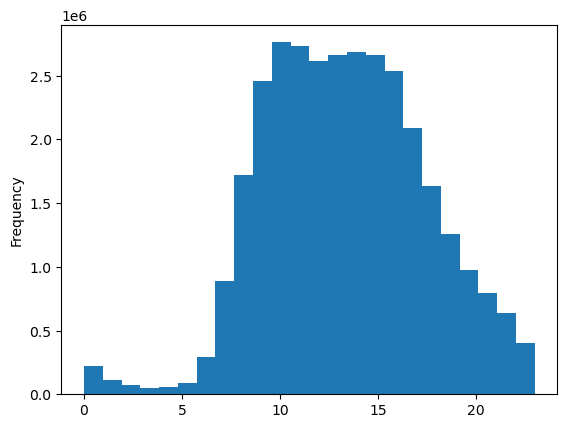

In [8]:
# create a histogram for the column
hist_orders_hour = customers_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

There is a steady increase from about 7 am to 9 am. Frequency stays above 2.5 until about 4pm, then there is a steady decrease until about midnight.

In [9]:
# Exporting the Histogram
hist_orders_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour.png'))

## Step 4 Bar chart for Loyalty 

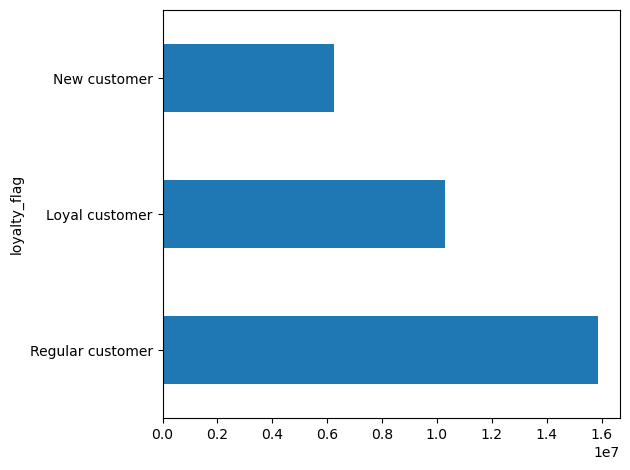

In [4]:
bar_loyalty = customers_ords_prods['loyalty_flag'].value_counts().plot.barh()
plt.tight_layout()

In [5]:
# exporting Bar chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_loyalty.png'))

Most costomers are flagged as regular loyalty.

## Step 5 Check whether there’s a difference in expenditure

In [35]:
np.random.seed(4)

In [36]:
dev = np.random.rand(len(customers_ords_prods)) <= 0.7

In [37]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [38]:
# Big is 70% of df
big = customers_ords_prods[dev]

In [39]:
# Small is 30%
small = customers_ords_prods[~dev]

In [40]:
# Checking the count of the whole df
len(customers_ords_prods)

32404859

In [41]:
# Confirming the sum is the same number
len(big)+len(small)

32404859

In [47]:
# Creating a subset only containing columns 'prices' and 'order hour of day'
df = small[['prices', 'order_hour_of_day']]

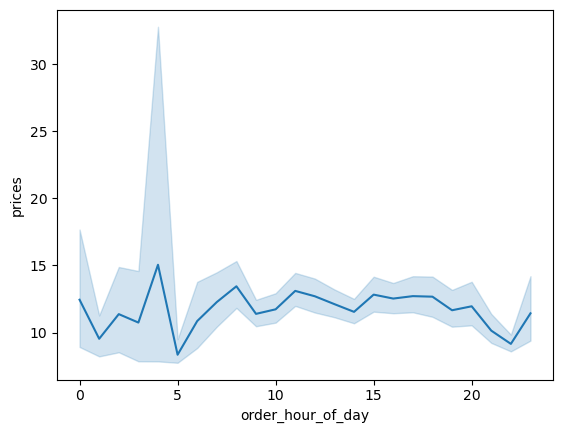

In [48]:
# Making a line plot with (small) subset
line_hour_price = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

The time of day has no relation to the prices of items.

In [45]:
# Export line chart
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

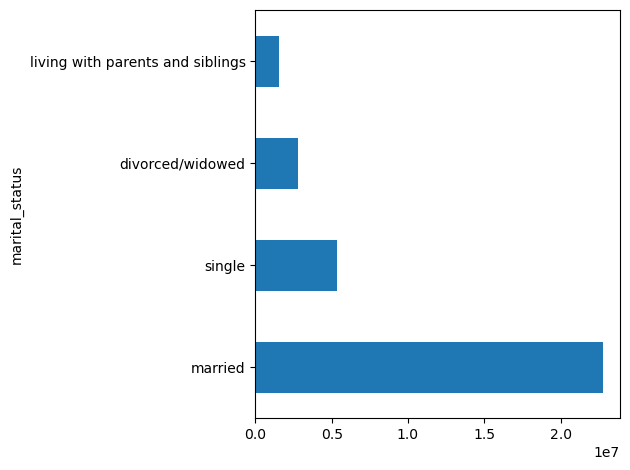

In [6]:
bar_marital = customers_ords_prods['marital_status'].value_counts().plot.barh()
plt.tight_layout()

Married customers are the majority of the instacaart customers.

In [45]:
# Export line chart
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

# Export bar chart
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_status.png'))

## Step 6: Find relationship between age and family situation with line chart

In [53]:
# Creating another subset with 'number_of_dependents' and 'age'
df_2 = small[['number_of_dependents', 'age']]

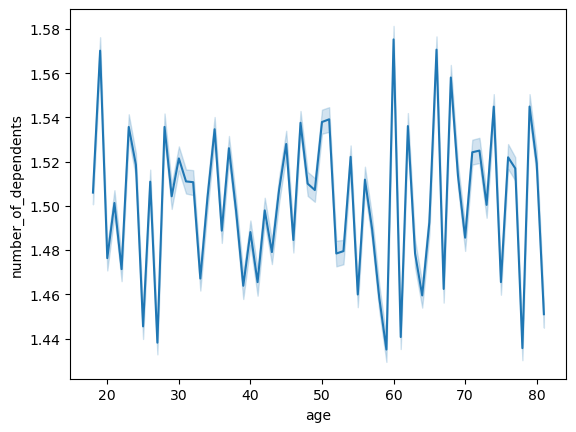

In [55]:
# Making a line plot with (small) subset
line_age_depend = sns.lineplot(data = df_2, x = 'age',y = 'number_of_dependents')

There is no correlation between number of dependents and age for each customer.

In [60]:
# Export line chart
line_age_depend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

## Step 7: Find relationship between age and income with scatterplot

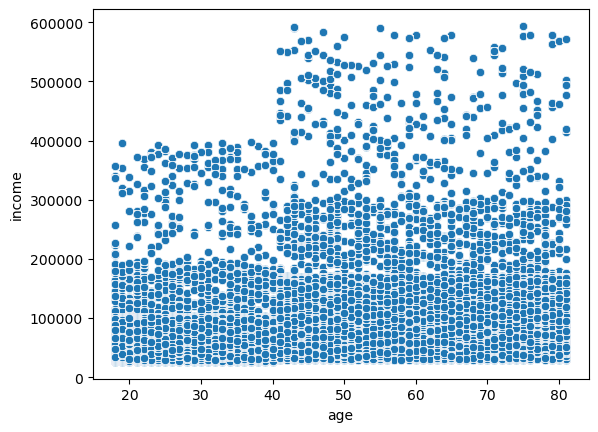

In [59]:
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = customers_ords_prods)

Customers aged 18 to about 40 make 400,000 or less in their total income. Customers older than 40 make up to 600,000 per year.

In [63]:
# Export scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))